In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Mall_customers.csv")
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency
0,1,19,35,37,Male,43900,1
1,2,41,39,54,Female,64631,12
2,3,45,33,29,Male,48885,15
3,4,21,41,27,Female,50946,12
4,5,27,30,57,Male,44848,11
...,...,...,...,...,...,...,...
89995,89996,33,70,60,Male,35343,19
89996,89997,18,52,62,Male,39550,15
89997,89998,46,43,70,Male,80699,14
89998,89999,39,90,11,Male,80828,17


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              90000 non-null  int64 
 1   Age                     90000 non-null  int64 
 2   Annual Income (k$)      90000 non-null  int64 
 3   Spending Score (1-100)  90000 non-null  int64 
 4   Gender                  90000 non-null  object
 5   Annual_Spend            90000 non-null  int64 
 6   Visit_Frequency         90000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 4.8+ MB


In [4]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(90000, 7)


In [5]:
data.dtypes

CustomerID                 int64
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Gender                    object
Annual_Spend               int64
Visit_Frequency            int64
dtype: object

In [6]:
print(data.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender  \
0           1   19                  35                      37    Male   
1           2   41                  39                      54  Female   
2           3   45                  33                      29    Male   
3           4   21                  41                      27  Female   
4           5   27                  30                      57    Male   

   Annual_Spend  Visit_Frequency  
0         43900                1  
1         64631               12  
2         48885               15  
3         50946               12  
4         44848               11  


In [7]:
print(data.isnull().sum())

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender                    0
Annual_Spend              0
Visit_Frequency           0
dtype: int64


In [8]:
print(data.describe())

         CustomerID           Age  Annual Income (k$)  Spending Score (1-100)  \
count  90000.000000  90000.000000        90000.000000            90000.000000   
mean   45000.500000     34.940100           49.907667               49.735944   
std    25980.906451     11.168142           19.303641               23.597911   
min        1.000000     18.000000           15.000000                1.000000   
25%    22500.750000     26.000000           36.000000               33.000000   
50%    45000.500000     35.000000           50.000000               50.000000   
75%    67500.250000     43.000000           63.000000               66.000000   
max    90000.000000     83.000000          132.000000              100.000000   

        Annual_Spend  Visit_Frequency  
count   90000.000000     90000.000000  
mean    49953.891333        11.546767  
std     15010.007588         4.933628  
min        52.000000         1.000000  
25%     39850.750000         8.000000  
50%     49951.000000        12

In [9]:
print(data['Gender'].value_counts())

Gender
Female    47437
Male      42563
Name: count, dtype: int64


In [10]:
# Summary statistics for Age
print(data['Age'].describe())

count    90000.000000
mean        34.940100
std         11.168142
min         18.000000
25%         26.000000
50%         35.000000
75%         43.000000
max         83.000000
Name: Age, dtype: float64


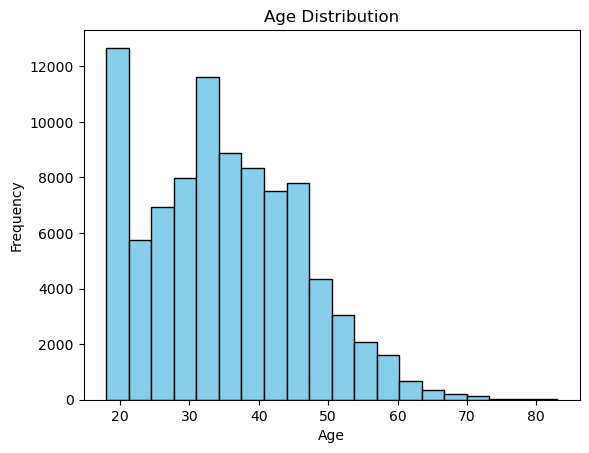

In [11]:
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

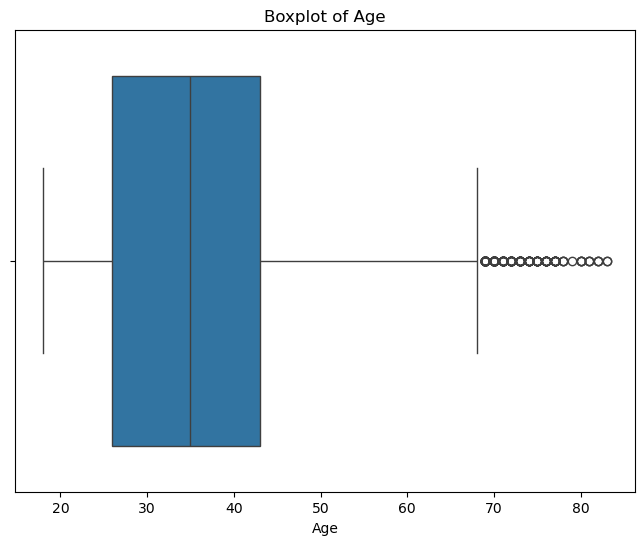

In [12]:
# Boxplot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

In [13]:
# Summary statistics of Annual Spend
print(data['Annual Income (k$)'].describe())

count    90000.000000
mean        49.907667
std         19.303641
min         15.000000
25%         36.000000
50%         50.000000
75%         63.000000
max        132.000000
Name: Annual Income (k$), dtype: float64


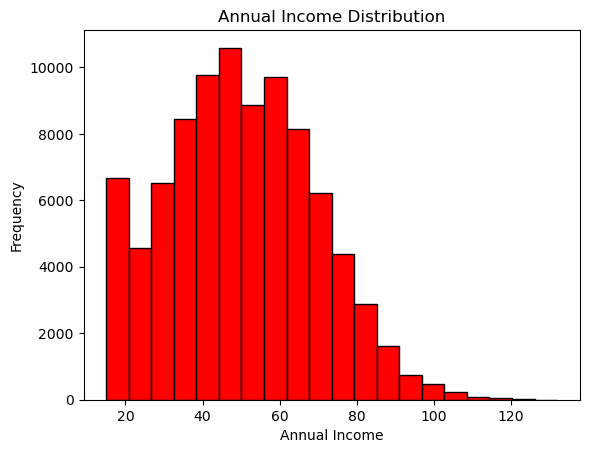

In [14]:
import matplotlib.pyplot as plt
# Histogram for Income
plt.hist(data['Annual Income (k$)'], bins=20, color='red', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

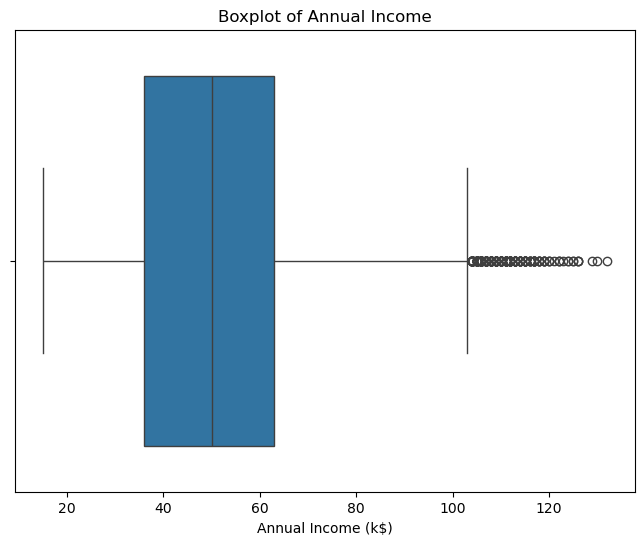

In [15]:
# Boxplot of Annual Income
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.show()

In [16]:
# Summary statistics of Annual Spend
print(data['Spending Score (1-100)'].describe())

count    90000.000000
mean        49.735944
std         23.597911
min          1.000000
25%         33.000000
50%         50.000000
75%         66.000000
max        100.000000
Name: Spending Score (1-100), dtype: float64


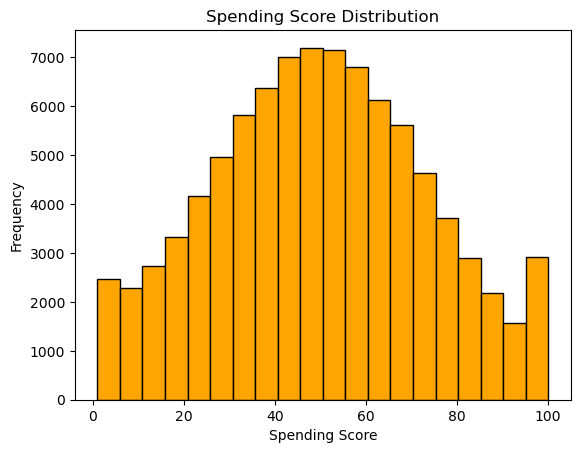

In [17]:
# Histogram for Spending
plt.hist(data['Spending Score (1-100)'], bins=20, color='orange', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

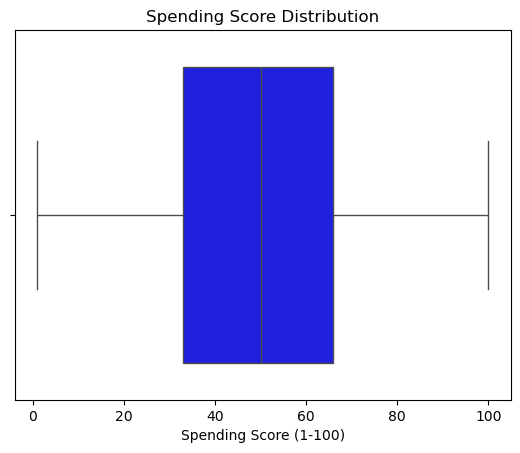

In [18]:
# Boxplot for spending
sns.boxplot(x=data['Spending Score (1-100)'], color='blue')
plt.title('Spending Score Distribution')
plt.show()

In [19]:
# Summary statistics of Annual Spend
print(data['Annual_Spend'].describe())

count     90000.000000
mean      49953.891333
std       15010.007588
min          52.000000
25%       39850.750000
50%       49951.000000
75%       60063.250000
max      123594.000000
Name: Annual_Spend, dtype: float64


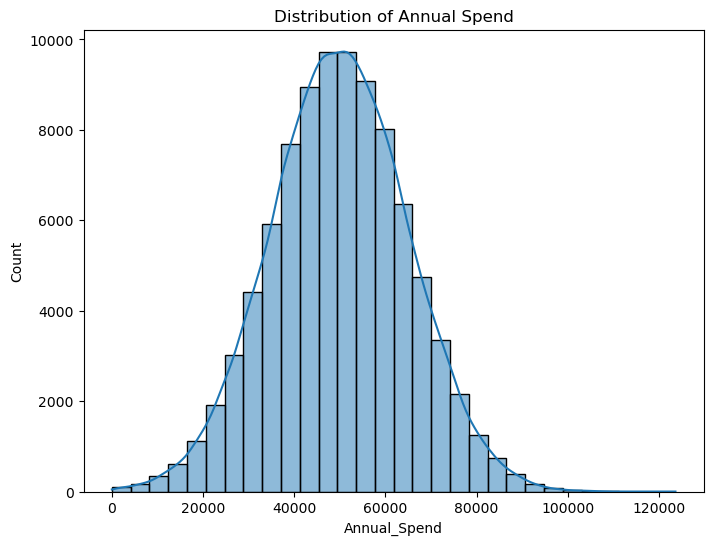

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Annual_Spend'], kde=True, bins=30)
plt.title('Distribution of Annual Spend')
plt.show()

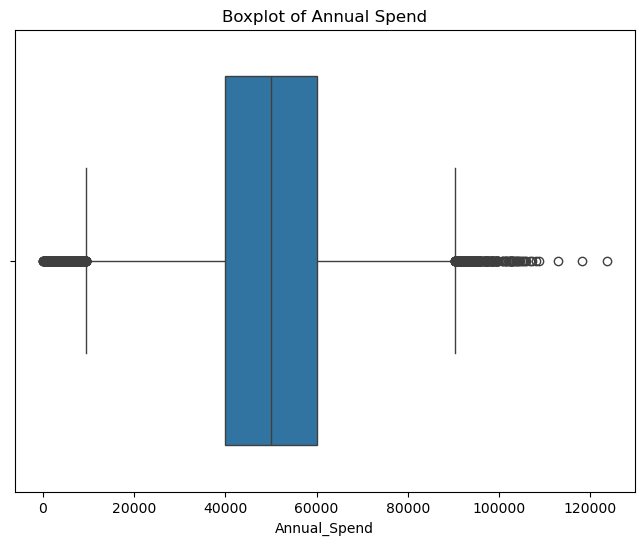

In [21]:
# Boxplot of Annual Spend
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Annual_Spend'])
plt.title('Boxplot of Annual Spend')
plt.show()

In [22]:
# Summary statistics of Annual Spend
print(data['Visit_Frequency'].describe())

count    90000.000000
mean        11.546767
std          4.933628
min          1.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         32.000000
Name: Visit_Frequency, dtype: float64


In [23]:
data['Visit_Frequency'] = pd.to_datetime(data['Visit_Frequency'])
data['Month'] = data['Visit_Frequency'].dt.month
data['DayOfWeek'] = data['Visit_Frequency'].dt.dayofweek

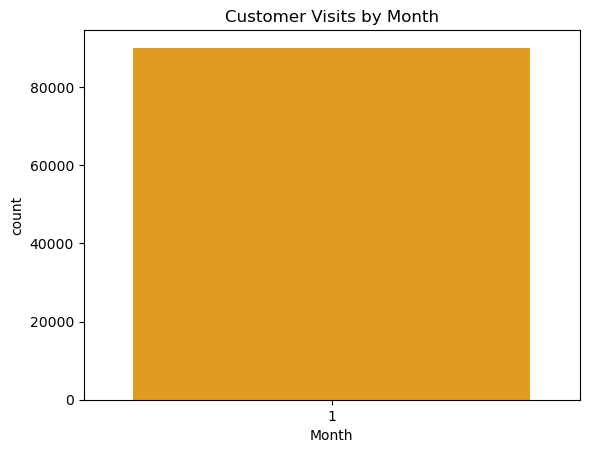

In [24]:
sns.countplot(x='Month', data=data, color='orange')
plt.title('Customer Visits by Month')
plt.show()

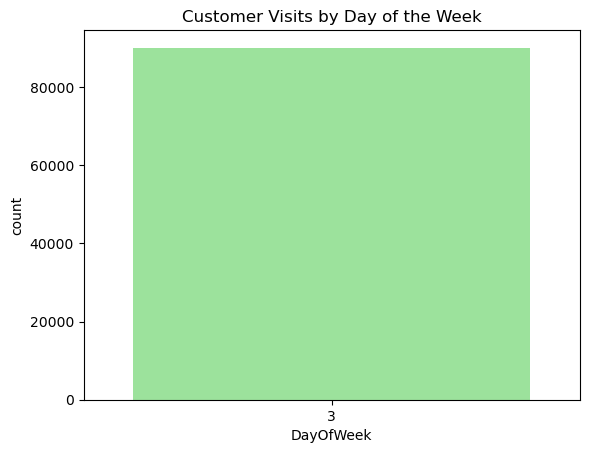

In [25]:
sns.countplot(x='DayOfWeek', data=data, color='lightgreen' )
plt.title('Customer Visits by Day of the Week')
plt.show()

In [26]:
corr_matrix = data.select_dtypes(include=['number']).corr()
print(corr_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.001960           -0.000656   
Age                      -0.001960  1.000000            0.008409   
Annual Income (k$)       -0.000656  0.008409            1.000000   
Spending Score (1-100)    0.000631 -0.000096            0.002100   
Annual_Spend             -0.000982  0.004076            0.007638   
Month                          NaN       NaN                 NaN   
DayOfWeek                      NaN       NaN                 NaN   

                        Spending Score (1-100)  Annual_Spend  Month  DayOfWeek  
CustomerID                            0.000631     -0.000982    NaN        NaN  
Age                                  -0.000096      0.004076    NaN        NaN  
Annual Income (k$)                    0.002100      0.007638    NaN        NaN  
Spending Score (1-100)                1.000000      0.005752    NaN        NaN  
Annual_Spend                          0.005752    

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])  # Converts 'Male'/'Female' to 0/1

# Now compute correlation
corr_matrix = data.corr()

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

print("Before Encoding:", data['Gender'].unique())

data['Gender'] = encoder.fit_transform(data['Gender'])

print("After Encoding:", data['Gender'].unique())

Before Encoding: [1 0]
After Encoding: [1 0]


In [29]:
corr_matrix = data.corr()
print(corr_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.001960           -0.000656   
Age                      -0.001960  1.000000            0.008409   
Annual Income (k$)       -0.000656  0.008409            1.000000   
Spending Score (1-100)    0.000631 -0.000096            0.002100   
Gender                   -0.001877 -0.000583           -0.007472   
Annual_Spend             -0.000982  0.004076            0.007638   
Visit_Frequency           0.004605 -0.001616           -0.001332   
Month                          NaN       NaN                 NaN   
DayOfWeek                      NaN       NaN                 NaN   

                        Spending Score (1-100)    Gender  Annual_Spend  \
CustomerID                            0.000631 -0.001877     -0.000982   
Age                                  -0.000096 -0.000583      0.004076   
Annual Income (k$)                    0.002100 -0.007472      0.007638   
Spending Score (1-100) 

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoder = LabelEncoder()
data['Month'] = encoder.fit_transform(data['Month'])
data['DayOfWeek'] = encoder.fit_transform(data['DayOfWeek'])

# Recalculate correlation
corr_matrix = data.corr()
print(corr_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.001960           -0.000656   
Age                      -0.001960  1.000000            0.008409   
Annual Income (k$)       -0.000656  0.008409            1.000000   
Spending Score (1-100)    0.000631 -0.000096            0.002100   
Gender                   -0.001877 -0.000583           -0.007472   
Annual_Spend             -0.000982  0.004076            0.007638   
Visit_Frequency           0.004605 -0.001616           -0.001332   
Month                          NaN       NaN                 NaN   
DayOfWeek                      NaN       NaN                 NaN   

                        Spending Score (1-100)    Gender  Annual_Spend  \
CustomerID                            0.000631 -0.001877     -0.000982   
Age                                  -0.000096 -0.000583      0.004076   
Annual Income (k$)                    0.002100 -0.007472      0.007638   
Spending Score (1-100) 

In [31]:
data = data.drop(columns=['CustomerID'])

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=['number'])), columns=data.select_dtypes(include=['number']).columns)

# Compute correlation again
corr_matrix = data_scaled.corr()
print(corr_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000            0.008409               -0.000096   
Annual Income (k$)      0.008409            1.000000                0.002100   
Spending Score (1-100) -0.000096            0.002100                1.000000   
Gender                 -0.000583           -0.007472               -0.000422   
Annual_Spend            0.004076            0.007638                0.005752   
Month                        NaN                 NaN                     NaN   
DayOfWeek                    NaN                 NaN                     NaN   

                          Gender  Annual_Spend  Month  DayOfWeek  
Age                    -0.000583      0.004076    NaN        NaN  
Annual Income (k$)     -0.007472      0.007638    NaN        NaN  
Spending Score (1-100) -0.000422      0.005752    NaN        NaN  
Gender                  1.000000     -0.002135    NaN        NaN  
Annual_Spend           -

In [33]:
# Ensure 'Month' and 'DayOfWeek' are converted to numeric
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['DayOfWeek'] = pd.to_numeric(data['DayOfWeek'], errors='coerce')

# Check for missing values
print(data[['Month', 'DayOfWeek']].isnull().sum())  # See if NaNs exist

# Fill missing values with median (or another strategy)
data['Month'].fillna(data['Month'].median(), inplace=True)
data['DayOfWeek'].fillna(data['DayOfWeek'].median(), inplace=True)

# Compute correlation again
corr_matrix = data.corr()
print(corr_matrix)


Month        0
DayOfWeek    0
dtype: int64
                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000            0.008409               -0.000096   
Annual Income (k$)      0.008409            1.000000                0.002100   
Spending Score (1-100) -0.000096            0.002100                1.000000   
Gender                 -0.000583           -0.007472               -0.000422   
Annual_Spend            0.004076            0.007638                0.005752   
Visit_Frequency        -0.001616           -0.001332               -0.000580   
Month                        NaN                 NaN                     NaN   
DayOfWeek                    NaN                 NaN                     NaN   

                          Gender  Annual_Spend  Visit_Frequency  Month  \
Age                    -0.000583      0.004076        -0.001616    NaN   
Annual Income (k$)     -0.007472      0.007638        -0.001332    NaN   
Spending Score

C:\Users\Bhagvan Reddy\AppData\Local\Temp\ipykernel_24248\3442662030.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Month'].fillna(data['Month'].median(), inplace=True)
C:\Users\Bhagvan Reddy\AppData\Local\Temp\ipykernel_24248\3442662030.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [34]:
data['Month'] = data['Month'].astype(int)
data['DayOfWeek'] = data['DayOfWeek'].astype(int)

# Compute correlation again
corr_matrix = data.corr()
print(corr_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000            0.008409               -0.000096   
Annual Income (k$)      0.008409            1.000000                0.002100   
Spending Score (1-100) -0.000096            0.002100                1.000000   
Gender                 -0.000583           -0.007472               -0.000422   
Annual_Spend            0.004076            0.007638                0.005752   
Visit_Frequency        -0.001616           -0.001332               -0.000580   
Month                        NaN                 NaN                     NaN   
DayOfWeek                    NaN                 NaN                     NaN   

                          Gender  Annual_Spend  Visit_Frequency  Month  \
Age                    -0.000583      0.004076        -0.001616    NaN   
Annual Income (k$)     -0.007472      0.007638        -0.001332    NaN   
Spending Score (1-100) -0.000422      0.005752        -0.

In [35]:
data['Month'] = data['Month'].astype(int)
data['DayOfWeek'] = data['DayOfWeek'].astype(int)

# Compute correlation again
corr_matrix = data.corr()
print(corr_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000            0.008409               -0.000096   
Annual Income (k$)      0.008409            1.000000                0.002100   
Spending Score (1-100) -0.000096            0.002100                1.000000   
Gender                 -0.000583           -0.007472               -0.000422   
Annual_Spend            0.004076            0.007638                0.005752   
Visit_Frequency        -0.001616           -0.001332               -0.000580   
Month                        NaN                 NaN                     NaN   
DayOfWeek                    NaN                 NaN                     NaN   

                          Gender  Annual_Spend  Visit_Frequency  Month  \
Age                    -0.000583      0.004076        -0.001616    NaN   
Annual Income (k$)     -0.007472      0.007638        -0.001332    NaN   
Spending Score (1-100) -0.000422      0.005752        -0.

In [36]:
# Check the data types again
print(data.dtypes)

# Convert 'Month' and 'DayOfWeek' to numeric
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['DayOfWeek'] = pd.to_numeric(data['DayOfWeek'], errors='coerce')

# Check for NaN values after conversion
print(data[['Month', 'DayOfWeek']].isnull().sum())

# Fill NaNs if any exist (optional)
data['Month'].fillna(data['Month'].median(), inplace=True)
data['DayOfWeek'].fillna(data['DayOfWeek'].median(), inplace=True)

# Compute correlation again
corr_matrix = data.corr()
print(corr_matrix)


Age                                int64
Annual Income (k$)                 int64
Spending Score (1-100)             int64
Gender                             int64
Annual_Spend                       int64
Visit_Frequency           datetime64[ns]
Month                              int32
DayOfWeek                          int32
dtype: object
Month        0
DayOfWeek    0
dtype: int64
                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000            0.008409               -0.000096   
Annual Income (k$)      0.008409            1.000000                0.002100   
Spending Score (1-100) -0.000096            0.002100                1.000000   
Gender                 -0.000583           -0.007472               -0.000422   
Annual_Spend            0.004076            0.007638                0.005752   
Visit_Frequency        -0.001616           -0.001332               -0.000580   
Month                        NaN                 NaN   

C:\Users\Bhagvan Reddy\AppData\Local\Temp\ipykernel_24248\3367625576.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Month'].fillna(data['Month'].median(), inplace=True)
C:\Users\Bhagvan Reddy\AppData\Local\Temp\ipykernel_24248\3367625576.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [38]:
data.isnull()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency,Month,DayOfWeek
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
89995,False,False,False,False,False,False,False,False
89996,False,False,False,False,False,False,False,False
89997,False,False,False,False,False,False,False,False
89998,False,False,False,False,False,False,False,False


In [39]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency,Month,DayOfWeek
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000,90000.0,90000.0
mean,34.940100,49.907667,49.735944,0.472922,49953.891333,1970-01-01 00:00:00.000000011,0.0,0.0
min,18.000000,15.000000,1.000000,0.000000,52.000000,1970-01-01 00:00:00.000000001,0.0,0.0
25%,26.000000,36.000000,33.000000,0.000000,39850.750000,1970-01-01 00:00:00.000000008,0.0,0.0
50%,35.000000,50.000000,50.000000,0.000000,49951.000000,1970-01-01 00:00:00.000000012,0.0,0.0
75%,43.000000,63.000000,66.000000,1.000000,60063.250000,1970-01-01 00:00:00.000000015,0.0,0.0
max,83.000000,132.000000,100.000000,1.000000,123594.000000,1970-01-01 00:00:00.000000032,0.0,0.0
std,11.168142,19.303641,23.597911,0.499269,15010.007588,NaN,0.0,0.0


In [40]:
data1 = data.iloc[:,1:]

In [41]:
data1

,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency,Month,DayOfWeek
0,35,37,1,43900,1970-01-01 00:00:00.000000001,0,0
1,39,54,0,64631,1970-01-01 00:00:00.000000012,0,0
2,33,29,1,48885,1970-01-01 00:00:00.000000015,0,0
3,41,27,0,50946,1970-01-01 00:00:00.000000012,0,0
4,30,57,1,44848,1970-01-01 00:00:00.000000011,0,0
...,...,...,...,...,...,...,...
89995,70,60,1,35343,1970-01-01 00:00:00.000000019,0,0
89996,52,62,1,39550,1970-01-01 00:00:00.000000015,0,0
89997,43,70,1,80699,1970-01-01 00:00:00.000000014,0,0
89998,90,11,1,80828,1970-01-01 00:00:00.000000017,0,0


In [42]:
cols = data.columns

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age                     90000 non-null  int64         
 1   Annual Income (k$)      90000 non-null  int64         
 2   Spending Score (1-100)  90000 non-null  int64         
 3   Gender                  90000 non-null  int64         
 4   Annual_Spend            90000 non-null  int64         
 5   Visit_Frequency         90000 non-null  datetime64[ns]
 6   Month                   90000 non-null  int32         
 7   DayOfWeek               90000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(5)
memory usage: 4.8 MB


In [44]:
data1 = pd.get_dummies(data1, drop_first=True)

In [45]:
cols = data1.columns

In [46]:
feature_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
features = data1[feature_columns]

In [47]:
kmeans = KMeans(n_clusters=5, random_state=42)
data1['Cluster'] = kmeans.fit_predict(features)

  File "C:\Users\Bhagvan Reddy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Bhagvan Reddy\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhagvan Reddy\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Bhagvan Reddy\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [49]:
print(data1['Cluster'].value_counts())

Cluster
3    23416
2    19117
4    17841
0    15414
1    14212
Name: count, dtype: int64


In [50]:
labels = kmeans.labels_
print(labels)  # This will print the cluster labels array


[0 3 0 ... 1 4 0]


In [52]:
data[data1['Cluster']==0]

,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency,Month,DayOfWeek
0,19,35,37,1,43900,1970-01-01 00:00:00.000000001,0,0
2,45,33,29,1,48885,1970-01-01 00:00:00.000000015,0,0
3,21,41,27,0,50946,1970-01-01 00:00:00.000000012,0,0
16,40,21,31,0,57954,1970-01-01 00:00:00.000000011,0,0
24,25,38,18,0,46457,1970-01-01 00:00:00.000000008,0,0
...,...,...,...,...,...,...,...,...
89982,31,30,10,1,67877,1970-01-01 00:00:00.000000016,0,0
89985,20,50,19,1,40794,1970-01-01 00:00:00.000000011,0,0
89991,18,40,35,1,33731,1970-01-01 00:00:00.000000019,0,0
89992,33,46,36,0,32538,1970-01-01 00:00:00.000000013,0,0


In [53]:
print(data1[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))


   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  35                      37        0
1                  39                      54        3
2                  33                      29        0
3                  41                      27        0
4                  30                      57        3
5                  59                      24        4
6                  38                      55        3
7                  39                      89        1
8                  52                      81        1
9                  38                      84        1


In [54]:

X = data1.drop(columns=['Visit_Frequency'])  
y = data1['Visit_Frequency']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [58]:
st.title(" Mall Customers Analysis")
st.subheader(" Model Performance")

2025-03-26 10:49:34.442 
  command:

    streamlit run C:\Users\Bhagvan Reddy\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [59]:
print(y_test.dtypes)


datetime64[ns]


In [60]:
y_test = y_test.astype('int64')  # Converts datetime to int (nanoseconds since epoch)


In [61]:
print(X.dtypes)  # Check data types of all columns
print(X.head())  # Look at the first few rows


Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender                    int64
Annual_Spend              int64
Month                     int32
DayOfWeek                 int32
Cluster                   int32
dtype: object
   Annual Income (k$)  Spending Score (1-100)  Gender  Annual_Spend  Month  \
0                  35                      37       1         43900      0   
1                  39                      54       0         64631      0   
2                  33                      29       1         48885      0   
3                  41                      27       0         50946      0   
4                  30                      57       1         44848      0   

   DayOfWeek  Cluster  
0          0        0  
1          0        3  
2          0        0  
3          0        0  
4          0        3  


In [63]:
print(X.dtypes)  

Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender                    int64
Annual_Spend              int64
Month                     int32
DayOfWeek                 int32
Cluster                   int32
dtype: object


In [66]:
print(X.dtypes)

Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender                    int64
Annual_Spend              int64
Month                     int32
DayOfWeek                 int32
dtype: object


In [67]:
print(y.dtypes)  

int64


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import io
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

st.title("Mall Customers Analysis")
st.subheader("Exploratory Data Analysis & Clustering")

feature_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
st.write("### Select Features for Clustering:")
selected_features = st.multiselect("Choose features", feature_columns, default=feature_columns)

if len(selected_features) >= 2:
    features = data[selected_features]
    

    kmeans = KMeans(n_clusters=5, random_state=42)
    data['Cluster'] = kmeans.fit_predict(features)
    
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(data1[selected_features[0]], data1[selected_features[1]], c=data1['Cluster'], cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    ax.set_xlabel(selected_features[0])
    ax.set_ylabel(selected_features[1])
    ax.set_title('Customer Segments')
    ax.legend()
    st.pyplot(fig)
    
    st.write("### Cluster Counts:")
    st.write(data1['Cluster'].value_counts())

st.subheader("Model Performance")
X = data1.drop(columns=['Cluster', 'Visit_Frequency'])
y = data1['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

mse_lin = mean_squared_error(y_test, lin_reg.predict(X_test))
mse_tree = mean_squared_error(y_test, tree_reg.predict(X_test))

st.write(f"**Linear Regression MSE:** {mse_lin:.2f}")
st.write(f"**Decision Tree Regression MSE:** {mse_tree:.2f}")
st.subheader("Decision Tree Visualization")
buffer = io.BytesIO()
fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(tree_reg, filled=True, feature_names=X.columns, ax=ax)
plt.savefig(buffer, format="png")
st.image(buffer, caption="Decision Tree Structure")



DeltaGenerator()

In [69]:
    fig, ax = plt.subplots()
    scatter = ax.scatter(data1[selected_features[0]], data1[selected_features[1]], c=data1['Cluster'], cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    ax.set_xlabel(selected_features[0])
    ax.set_ylabel(selected_features[1])
    ax.set_title('Customer Segments')
    ax.legend()
    st.pyplot(fig)


DeltaGenerator()

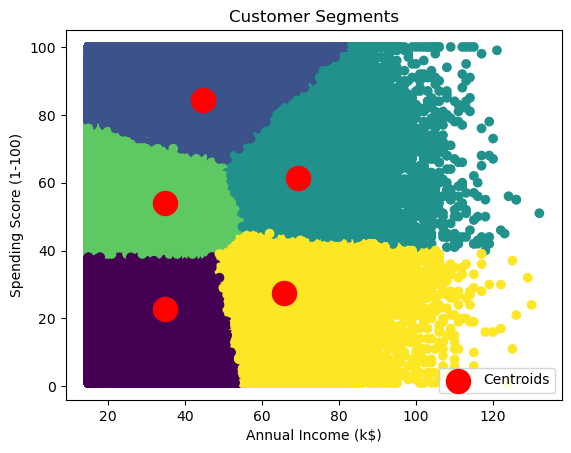

In [72]:

fig, ax = plt.subplots()
scatter = ax.scatter(data1[selected_features[0]], data1[selected_features[1]], c=data1['Cluster'], cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_title('Customer Segments')

ax.legend()

plt.show()


In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "Mall_customers.csv"  # Ensure the file is in the same directory as the Jupyter Notebook
df = pd.read_csv(file_path)

feature_columns = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[feature_columns]



y = data1["Cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
def predict_cluster(annual_income, spending_score):
    return rf_classifier.predict(np.array([[annual_income, spending_score]]))[0]

# Example usage
example_income = 40
example_spending = 60
predicted_cluster = predict_cluster(example_income, example_spending)
print(f"Predicted Cluster: {predicted_cluster}")



Predicted Cluster: 3
